# Oscilador Armónico Simple

Importamos bibliotecas varias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.polynomial.hermite import hermval
%matplotlib inline

Definimos los parámetros de la simulación, el número de puntos en la grilla, los límites izquierdo y derecho, calculamos $\Delta x$, definimos $\hbar$, la masa, la constante de fuerza. $t$ es $\frac{\hbar^2}{2m}\frac{1}{(\Delta x)^2}$

In [2]:
ngrid = 1001
xmin = -15.0
xmax =  15.0
deltax = (xmax - xmin) / float(ngrid-1)
hbar = 1.0
mass = 1.7
k = 2.3
t = hbar**2 / (2.0 * mass * deltax**2)

Grilla en el espacio real entre los límites

In [3]:
xgrid = np.linspace(xmin, xmax, ngrid)

$\delta_{ij}$ la delta de Kronecker

In [4]:
def kdelta(k, l):
    if k == l: return True
    else: return False

La función potencial

In [5]:
def V(x):
    return 0.5*k*x**2

Definimos el operador Hamiltoniano

In [6]:
H = np.zeros((ngrid,ngrid))
for i in range(0,ngrid):
    for j in range(0,ngrid):
        if kdelta(i,j+1):
            H[i,j] = - t / 1.0
        if kdelta(i,j-1):
            H[i,j] = - t / 1.0 
        if kdelta(i,j):
            H[i,j] = 2.0 * t + V(xgrid[i])

Diagonalizamos y obtenemos autovalores y autovectores

In [7]:
evals, evecs = np.linalg.eigh(H)

El potencial

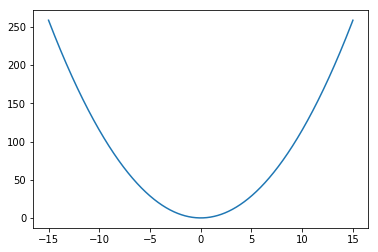

In [8]:
plt.plot(xgrid,V(xgrid))

La probabilidad en el estado fundamental y el primer estado excitado

(-5, 5)

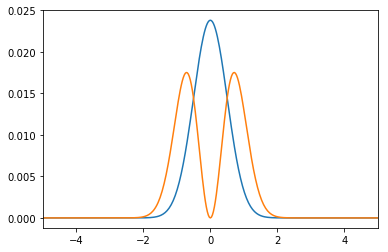

In [9]:
plt.plot(xgrid,evecs[:,0]**2)
plt.plot(xgrid,evecs[:,1]**2)
plt.xlim([-5,5])

La función de onda en el estado fundamental y el primer estado excitado

(-5, 5)

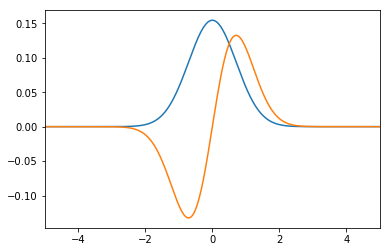

In [10]:
plt.plot(xgrid,evecs[:,0])
plt.plot(xgrid,evecs[:,1])
plt.xlim([-5,5])

La solución exacta (un lío)

In [11]:
def state(x,n):
    coefs = np.zeros((10))
    coefs[n] = 1.0
    omega = np.sqrt( k / mass )
    f1 = 1.0 / math.sqrt( 2**n * math.factorial(n) )
    f2 = math.pow( ( mass * omega ) / ( math.pi * hbar ) , 1.0 / 4.0 )
    f3 = np.exp( -( mass * omega * x**2 ) / ( 2.0 * hbar ) )
    H = hermval(np.sqrt((mass*omega)/hbar)*x,coefs)
    return (f1*f2*f3*H)

Comparamos el estado fundamental con el exacto

(-5, 5)

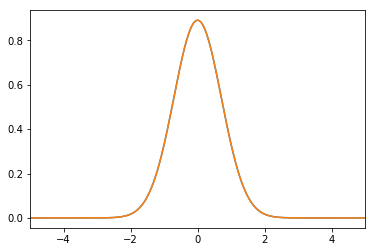

In [12]:
plt.plot(xgrid,state(xgrid,0))
plt.plot(xgrid,(evecs[:,0])/math.sqrt(deltax))
plt.xlim([-5,5])

(-5, 5)

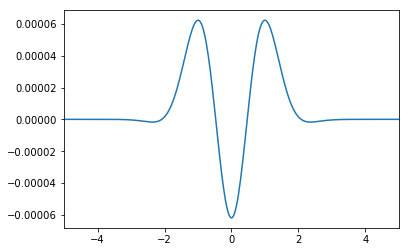

In [13]:
plt.plot(xgrid,state(xgrid,0)-(evecs[:,0])/math.sqrt(deltax))
plt.xlim([-5,5])

Comparamos el primer estado excitado con el exacto

(-5, 5)

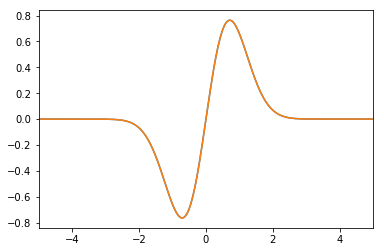

In [14]:
plt.plot(xgrid,state(xgrid,1))
plt.plot(xgrid,(evecs[:,1])/math.sqrt(deltax))
plt.xlim([-5,5])

(-5, 5)

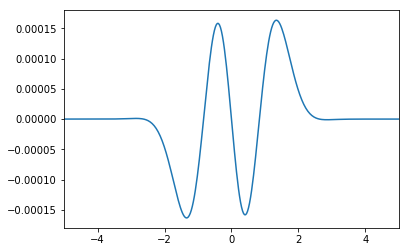

In [15]:
plt.plot(xgrid,state(xgrid,1)-(evecs[:,1])/math.sqrt(deltax))
plt.xlim([-5,5])

Comparamos el segundo estado excitado con el exacto

(-5, 5)

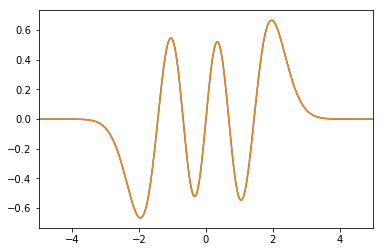

In [16]:
plt.plot(xgrid,state(xgrid,5))
plt.plot(xgrid,(evecs[:,5])/math.sqrt(deltax))
plt.xlim([-5,5])

El error se hace más grande a medida que pretendemos estimar estados más altos

(-5, 5)

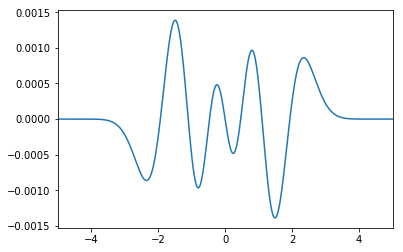

In [17]:
plt.plot(xgrid,state(xgrid,5)-(evecs[:,5])/math.sqrt(deltax))
plt.xlim([-5,5])

El autovalor del estado fundamental, calculado también a partir del bracket

In [18]:
evals[0]

0.58151530334030932

In [19]:
np.sum(np.dot(evecs[:,0],np.dot(H,evecs[:,0])))

0.58151530334039525

Calculamos los diez primeros autovalores exactos usando $(n+\frac{1}{2})\omega$, el error aumenta cuando pretendemos estimar autovalores más altos.

In [20]:
evals_exactos = []
for i in range(0,10):
    evals_exactos.append((i+0.5)*hbar*math.sqrt(k/mass))

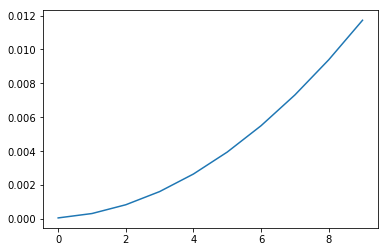

In [21]:
plt.plot(np.absolute(evals[0:10]-evals_exactos))

In [22]:
np.absolute((evals[0:10]-evals_exactos))

array([  6.46946975e-05,   3.23502291e-04,   8.41189525e-04,
         1.61784293e-03,   2.65354914e-03,   3.94839487e-03,
         5.50246696e-03,   7.31585231e-03,   9.38863795e-03,
         1.17209110e-02])